# **TP2**

##*Organización de Datos (75.06/95.58) - Primer Cuatrimestre 2021*

###### Julio de 2021
---

In [ ]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importamos los archivos de entrada desde google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1d3bvCoox6nxGIWx81EMEQl_hJ1Y0Jp1q/view?usp=sharing' 
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_values.csv')

train_values=pd.read_csv('train_values.csv', index_col='building_id')

In [ ]:
link = 'https://drive.google.com/file/d/1zsOf_CScGSl6O2CBbgQUX7TH3CALpXbl/view?usp=sharing' 
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_labels.csv')

train_labels=pd.read_csv('train_labels.csv', index_col='building_id')

#Damage grade:
#1 - Low damage
#2 - Medium damage
#3 - Serious damage


In [ ]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

#metric
from sklearn.metrics import f1_score

In [ ]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cat_cols=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',
          'position','plan_configuration','legal_ownership_status','geo_level_1_id','geo_level_2_id','geo_level_3_id']
for cc in cat_cols:
    train_values[cc]=train_values[cc].astype('category')

In [ ]:
X_dev = train_values

Y_dev = train_labels['damage_grade'].astype('category')

Y_dev


building_id
802906    3
28830     2
94947     3
590882    2
201944    3
         ..
688636    2
669485    3
602512    3
151409    2
747594    3
Name: damage_grade, Length: 260601, dtype: category
Categories (3, int64): [1, 2, 3]

In [ ]:
from sklearn.model_selection import train_test_split

seed=2

valsize=0.25
X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=valsize, random_state=seed)

# Modelo: CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier,Pool

     |████████████████████████████████| 69.2 MB 6.4 kB/s 


##S0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195450 entries, 984478 to 261771
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   geo_level_1_id                          195450 non-null  category
 1   geo_level_2_id                          195450 non-null  category
 2   geo_level_3_id                          195450 non-null  category
 3   count_floors_pre_eq                     195450 non-null  int64   
 4   age                                     195450 non-null  int64   
 5   area_percentage                         195450 non-null  int64   
 6   height_percentage                       195450 non-null  int64   
 7   land_surface_condition                  195450 non-null  category
 8   foundation_type                         195450 non-null  category
 9   roof_type                               195450 non-null  category
 10  ground_floor_type          

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns ,verbose=True)
model.fit(X_train,Y_train)

Learning rate set to 0.103554
0:	learn: 1.0248736	total: 1.3s	remaining: 21m 38s
1:	learn: 0.9677229	total: 2.52s	remaining: 20m 56s
2:	learn: 0.9215242	total: 3.6s	remaining: 19m 56s
3:	learn: 0.8831610	total: 4.62s	remaining: 19m 9s
4:	learn: 0.8514048	total: 5.8s	remaining: 19m 14s
5:	learn: 0.8245617	total: 6.78s	remaining: 18m 42s
6:	learn: 0.8015431	total: 7.67s	remaining: 18m 7s
7:	learn: 0.7815638	total: 8.64s	remaining: 17m 51s
8:	learn: 0.7647116	total: 9.73s	remaining: 17m 51s
9:	learn: 0.7489991	total: 11s	remaining: 18m 12s
10:	learn: 0.7358877	total: 12.1s	remaining: 18m 5s
11:	learn: 0.7246292	total: 13.5s	remaining: 18m 33s
12:	learn: 0.7150289	total: 14.8s	remaining: 18m 43s
13:	learn: 0.7065715	total: 16.1s	remaining: 18m 55s
14:	learn: 0.6988371	total: 17.3s	remaining: 18m 58s
15:	learn: 0.6894655	total: 18.6s	remaining: 19m 3s
16:	learn: 0.6810850	total: 19.6s	remaining: 18m 51s
17:	learn: 0.6739060	total: 20.6s	remaining: 18m 43s
18:	learn: 0.6678250	total: 21.7s	r

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.7473100950100535


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 'loss_functi

# Variación de parámetros

## ctr_target_border_count


In [ ]:
ctr= [1,5,10,20]
f1_ctr=[]

 ### 1

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, ctr_target_border_count=1, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6279304	total: 921ms	remaining: 15m 20s
1:	learn: 0.6333231	total: 1.82s	remaining: 15m 7s
2:	learn: 0.6362701	total: 2.6s	remaining: 14m 25s
3:	learn: 0.6446866	total: 3.39s	remaining: 14m 4s
4:	learn: 0.6445229	total: 4.13s	remaining: 13m 41s
5:	learn: 0.6452801	total: 4.81s	remaining: 13m 16s
6:	learn: 0.6454438	total: 5.59s	remaining: 13m 13s
7:	learn: 0.6449680	total: 6.38s	remaining: 13m 11s
8:	learn: 0.6442671	total: 7.08s	remaining: 12m 59s
9:	learn: 0.6448043	total: 7.92s	remaining: 13m 4s
10:	learn: 0.6461243	total: 8.66s	remaining: 12m 58s
11:	learn: 0.6463904	total: 9.55s	remaining: 13m 5s
12:	learn: 0.6498235	total: 10.4s	remaining: 13m 8s
13:	learn: 0.6539933	total: 11.2s	remaining: 13m 6s
14:	learn: 0.6549706	total: 11.8s	remaining: 12m 58s
15:	learn: 0.6565362	total: 12.5s	remaining: 12m 51s
16:	learn: 0.6598260	total: 13.3s	remaining: 12m 48s
17:	learn: 0.6599233	total: 14s	remaining: 12m 46s
18:	learn: 0.6609517	total: 14.8s	r

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_ctr.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7250080582032509


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 5

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, ctr_target_border_count=5, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6922231	total: 2.81s	remaining: 46m 50s
1:	learn: 0.6981325	total: 5.14s	remaining: 42m 46s
2:	learn: 0.6980967	total: 7.24s	remaining: 40m 4s
3:	learn: 0.6989563	total: 9.73s	remaining: 40m 23s
4:	learn: 0.6994270	total: 11.9s	remaining: 39m 36s
5:	learn: 0.7000205	total: 14s	remaining: 38m 36s
6:	learn: 0.7021233	total: 16.8s	remaining: 39m 46s
7:	learn: 0.7027168	total: 19.2s	remaining: 39m 39s
8:	learn: 0.7026247	total: 21.5s	remaining: 39m 27s
9:	learn: 0.7030391	total: 23.5s	remaining: 38m 45s
10:	learn: 0.7031722	total: 25.6s	remaining: 38m 17s
11:	learn: 0.7036378	total: 27.9s	remaining: 38m 16s
12:	learn: 0.7039857	total: 30.2s	remaining: 38m 13s
13:	learn: 0.7043541	total: 32.7s	remaining: 38m 20s
14:	learn: 0.7046764	total: 35.5s	remaining: 38m 53s
15:	learn: 0.7051420	total: 37.7s	remaining: 38m 41s
16:	learn: 0.7052034	total: 40.2s	remaining: 38m 45s
17:	learn: 0.7075313	total: 42.5s	remaining: 38m 38s
18:	learn: 0.7112203	total: 4

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_ctr.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.746680787708554


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=5:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 5,
 'depth': 6,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 10

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, ctr_target_border_count=10, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6922845	total: 4.05s	remaining: 1h 7m 31s
1:	learn: 0.6964492	total: 8.83s	remaining: 1h 13m 24s
2:	learn: 0.6985981	total: 12.6s	remaining: 1h 9m 44s
3:	learn: 0.7006958	total: 16.4s	remaining: 1h 7m 53s
4:	learn: 0.7010386	total: 20.5s	remaining: 1h 7m 59s
5:	learn: 0.7016833	total: 24.7s	remaining: 1h 8m 19s
6:	learn: 0.7021540	total: 29.1s	remaining: 1h 8m 48s
7:	learn: 0.7032029	total: 33.4s	remaining: 1h 8m 59s
8:	learn: 0.7031415	total: 37.5s	remaining: 1h 8m 47s
9:	learn: 0.7032694	total: 42.6s	remaining: 1h 10m 14s
10:	learn: 0.7031364	total: 47.1s	remaining: 1h 10m 35s
11:	learn: 0.7032694	total: 51s	remaining: 1h 9m 55s
12:	learn: 0.7036940	total: 55.6s	remaining: 1h 10m 19s
13:	learn: 0.7040778	total: 1m 1s	remaining: 1h 12m 26s
14:	learn: 0.7044052	total: 1m 5s	remaining: 1h 11m 56s
15:	learn: 0.7052392	total: 1m 10s	remaining: 1h 12m 7s
16:	learn: 0.7080430	total: 1m 13s	remaining: 1h 11m 11s
17:	learn: 0.7107496	total: 1m 15s	rem

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_ctr.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7464352043713834


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=10:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 10,
 'depth': 6,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,


### 20

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, ctr_target_border_count=20, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6949501	total: 10.1s	remaining: 2h 48m 39s
1:	learn: 0.6948120	total: 18.7s	remaining: 2h 35m 7s
2:	learn: 0.6993707	total: 27.6s	remaining: 2h 32m 39s
3:	learn: 0.7000512	total: 35.5s	remaining: 2h 27m 18s
4:	learn: 0.6998107	total: 43.4s	remaining: 2h 23m 54s
5:	learn: 0.7014275	total: 52.4s	remaining: 2h 24m 43s
6:	learn: 0.7022870	total: 59.1s	remaining: 2h 19m 42s
7:	learn: 0.7025582	total: 1m 7s	remaining: 2h 19m 34s
8:	learn: 0.7027731	total: 1m 15s	remaining: 2h 18m 32s
9:	learn: 0.7030033	total: 1m 23s	remaining: 2h 17m 59s
10:	learn: 0.7031875	total: 1m 31s	remaining: 2h 17m 48s
11:	learn: 0.7034894	total: 1m 42s	remaining: 2h 20m 47s
12:	learn: 0.7039089	total: 1m 50s	remaining: 2h 20m 8s
13:	learn: 0.7040624	total: 1m 59s	remaining: 2h 20m 20s
14:	learn: 0.7044871	total: 2m 8s	remaining: 2h 20m 54s
15:	learn: 0.7047685	total: 2m 17s	remaining: 2h 21m 12s
16:	learn: 0.7073267	total: 2m 24s	remaining: 2h 19m 39s
17:	learn: 0.7100026	t

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_ctr.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.746020782489908


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=20:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 20,
 'depth': 6,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,


### Gráfico

Text(0.5, 1.0, 'CatBoost: set S0')

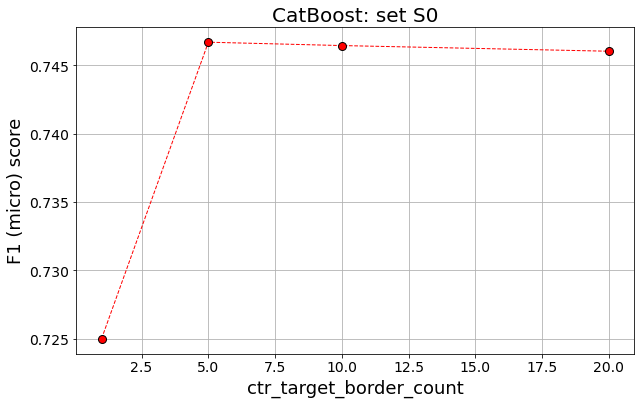

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(zorder=0)
plt.plot(ctr, f1_ctr, 'o--', color='red', markeredgecolor = 'k',  linewidth=1, markersize=8)
plt.xlabel(r'ctr_target_border_count',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('F1 (micro) score',fontsize=18)

plt.title(r'CatBoost: set S0',fontsize=20)

## depth


In [ ]:
dep= [6,7,8,9,10]
f1_dep=[]

### 6

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=6, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6927091	total: 1.29s	remaining: 21m 29s
1:	learn: 0.6933078	total: 2.37s	remaining: 19m 43s
2:	learn: 0.6977232	total: 3.36s	remaining: 18m 37s
3:	learn: 0.6971450	total: 4.51s	remaining: 18m 42s
4:	learn: 0.6989051	total: 5.47s	remaining: 18m 7s
5:	learn: 0.6994935	total: 6.47s	remaining: 17m 52s
6:	learn: 0.6994474	total: 7.67s	remaining: 18m 8s
7:	learn: 0.7022717	total: 8.98s	remaining: 18m 33s
8:	learn: 0.7026656	total: 10.1s	remaining: 18m 29s
9:	learn: 0.7030033	total: 10.9s	remaining: 18m 1s
10:	learn: 0.7033871	total: 12s	remaining: 17m 58s
11:	learn: 0.7034843	total: 13s	remaining: 17m 50s
12:	learn: 0.7037554	total: 14.1s	remaining: 17m 52s
13:	learn: 0.7043080	total: 15s	remaining: 17m 38s
14:	learn: 0.7044615	total: 16s	remaining: 17m 33s
15:	learn: 0.7067792	total: 17.1s	remaining: 17m 33s
16:	learn: 0.7098746	total: 18s	remaining: 17m 23s
17:	learn: 0.7118445	total: 19s	remaining: 17m 15s
18:	learn: 0.7140087	total: 20.1s	remaini

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_dep.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7459900845727617


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 7

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=7, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6950064	total: 1.45s	remaining: 24m 3s
1:	learn: 0.6963929	total: 2.96s	remaining: 24m 37s
2:	learn: 0.6983525	total: 4.28s	remaining: 23m 43s
3:	learn: 0.7002814	total: 5.49s	remaining: 22m 45s
4:	learn: 0.6999437	total: 6.67s	remaining: 22m 6s
5:	learn: 0.7017805	total: 7.72s	remaining: 21m 18s
6:	learn: 0.7021233	total: 9.29s	remaining: 21m 58s
7:	learn: 0.7024047	total: 10.4s	remaining: 21m 28s
8:	learn: 0.7030545	total: 11.8s	remaining: 21m 36s
9:	learn: 0.7036736	total: 13.5s	remaining: 22m 17s
10:	learn: 0.7040931	total: 15.2s	remaining: 22m 44s
11:	learn: 0.7045792	total: 16.4s	remaining: 22m 32s
12:	learn: 0.7045945	total: 17.7s	remaining: 22m 27s
13:	learn: 0.7081300	total: 19.2s	remaining: 22m 33s
14:	learn: 0.7118138	total: 20.5s	remaining: 22m 23s
15:	learn: 0.7143771	total: 21.8s	remaining: 22m 23s
16:	learn: 0.7159632	total: 23.1s	remaining: 22m 14s
17:	learn: 0.7168432	total: 24.4s	remaining: 22m 11s
18:	learn: 0.7181683	total: 

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_dep.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7476170741815169


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 7,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 8

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6954413	total: 2.51s	remaining: 41m 50s
1:	learn: 0.6973190	total: 4.59s	remaining: 38m 12s
2:	learn: 0.6983832	total: 6.53s	remaining: 36m 11s
3:	learn: 0.6999949	total: 8.44s	remaining: 35m
4:	learn: 0.7027833	total: 10.9s	remaining: 36m 13s
5:	learn: 0.7037964	total: 13s	remaining: 35m 54s
6:	learn: 0.7042824	total: 15.2s	remaining: 35m 53s
7:	learn: 0.7048145	total: 17.7s	remaining: 36m 39s
8:	learn: 0.7051727	total: 19.9s	remaining: 36m 31s
9:	learn: 0.7056076	total: 22.3s	remaining: 36m 46s
10:	learn: 0.7062829	total: 24.3s	remaining: 36m 28s
11:	learn: 0.7061960	total: 26.9s	remaining: 36m 53s
12:	learn: 0.7066462	total: 29.2s	remaining: 36m 54s
13:	learn: 0.7068406	total: 31.8s	remaining: 37m 16s
14:	learn: 0.7073625	total: 34.3s	remaining: 37m 29s
15:	learn: 0.7078127	total: 36.9s	remaining: 37m 47s
16:	learn: 0.7110668	total: 38.8s	remaining: 37m 24s
17:	learn: 0.7134817	total: 40.6s	remaining: 36m 55s
18:	learn: 0.7158608	total: 42.9

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_dep.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7490445273288208


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 9

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=9, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6954413	total: 3.04s	remaining: 50m 37s
1:	learn: 0.6975339	total: 5.78s	remaining: 48m 3s
2:	learn: 0.7036992	total: 8.63s	remaining: 47m 47s
3:	learn: 0.7032284	total: 11.3s	remaining: 46m 56s
4:	learn: 0.7037554	total: 14.2s	remaining: 47m 2s
5:	learn: 0.7039601	total: 16.9s	remaining: 46m 41s
6:	learn: 0.7041750	total: 20.3s	remaining: 47m 58s
7:	learn: 0.7047992	total: 23.3s	remaining: 48m 13s
8:	learn: 0.7050601	total: 26.3s	remaining: 48m 16s
9:	learn: 0.7057304	total: 29.2s	remaining: 48m 13s
10:	learn: 0.7068202	total: 32.8s	remaining: 49m 12s
11:	learn: 0.7074597	total: 36.1s	remaining: 49m 29s
12:	learn: 0.7071937	total: 38.6s	remaining: 48m 52s
13:	learn: 0.7077104	total: 41.8s	remaining: 49m 1s
14:	learn: 0.7084421	total: 45.3s	remaining: 49m 32s
15:	learn: 0.7089690	total: 48.7s	remaining: 49m 54s
16:	learn: 0.7113431	total: 52.2s	remaining: 50m 19s
17:	learn: 0.7140599	total: 55.2s	remaining: 50m 9s
18:	learn: 0.7168995	total: 57

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_dep.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7471873033414683


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 9,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### 10

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=10, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6954413	total: 3.05s	remaining: 50m 43s
1:	learn: 0.6975237	total: 6.47s	remaining: 53m 46s
2:	learn: 0.6990586	total: 9.79s	remaining: 54m 12s
3:	learn: 0.7014377	total: 12.6s	remaining: 52m 12s
4:	learn: 0.7038373	total: 16s	remaining: 52m 59s
5:	learn: 0.7041238	total: 19.4s	remaining: 53m 34s
6:	learn: 0.7049783	total: 23s	remaining: 54m 29s
7:	learn: 0.7058992	total: 26.5s	remaining: 54m 50s
8:	learn: 0.7068048	total: 30.3s	remaining: 55m 38s
9:	learn: 0.7071118	total: 34.4s	remaining: 56m 44s
10:	learn: 0.7075058	total: 39s	remaining: 58m 25s
11:	learn: 0.7077923	total: 43.4s	remaining: 59m 35s
12:	learn: 0.7081965	total: 47.1s	remaining: 59m 32s
13:	learn: 0.7088463	total: 51s	remaining: 59m 50s
14:	learn: 0.7139268	total: 54.8s	remaining: 59m 58s
15:	learn: 0.7162855	total: 58.6s	remaining: 1h 6s
16:	learn: 0.7173855	total: 59.5s	remaining: 57m 22s
17:	learn: 0.7198823	total: 1m 2s	remaining: 56m 57s
18:	learn: 0.7214735	total: 1m 6s	re

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
f1_dep.append(f1_val)
print('F1_val = ', f1_val)

F1_val =  0.7476477720986631


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 10,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 

### Gráfico

Text(0.5, 1.0, 'CatBoost: set S0')

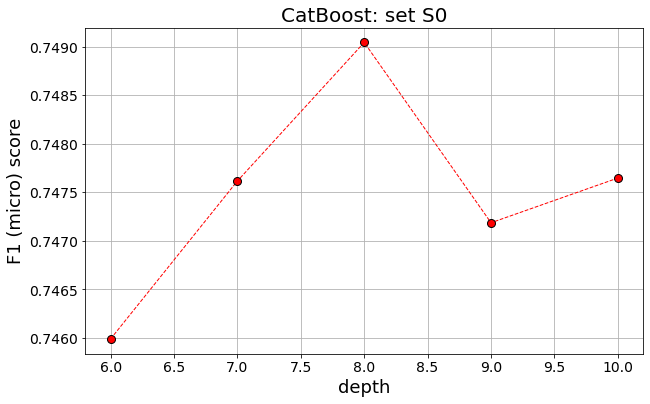

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(zorder=0)
plt.plot(dep, f1_dep, 'o--', color='red', markeredgecolor = 'k',  linewidth=1, markersize=8)
plt.xlabel(r'depth',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('F1 (micro) score',fontsize=18)

plt.title(r'CatBoost: set S0',fontsize=20)

## Depth = 8. Varía ctrl

### ctrl=1

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, ctr_target_border_count= 1, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6326836	total: 2.01s	remaining: 33m 28s
1:	learn: 0.6407112	total: 3.79s	remaining: 31m 30s
2:	learn: 0.6443131	total: 5.4s	remaining: 29m 55s
3:	learn: 0.6455257	total: 7.07s	remaining: 29m 19s
4:	learn: 0.6447224	total: 7.87s	remaining: 26m 5s
5:	learn: 0.6450601	total: 9.54s	remaining: 26m 20s
6:	learn: 0.6466155	total: 11.4s	remaining: 26m 53s
7:	learn: 0.6481197	total: 13s	remaining: 26m 54s
8:	learn: 0.6486672	total: 14.7s	remaining: 27m 1s
9:	learn: 0.6498184	total: 16.6s	remaining: 27m 22s
10:	learn: 0.6497826	total: 18.3s	remaining: 27m 29s
11:	learn: 0.6510003	total: 20s	remaining: 27m 30s
12:	learn: 0.6613558	total: 21.9s	remaining: 27m 44s
13:	learn: 0.6632643	total: 23.7s	remaining: 27m 48s
14:	learn: 0.6639089	total: 25.3s	remaining: 27m 42s
15:	learn: 0.6657611	total: 26.7s	remaining: 27m 20s
16:	learn: 0.6668918	total: 28.3s	remaining: 27m 14s
17:	learn: 0.6674904	total: 29.9s	remaining: 27m 11s
18:	learn: 0.6686160	total: 31.7s

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.731792297892588


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### ctrl=2

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, ctr_target_border_count= 2, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6954413	total: 2.46s	remaining: 40m 54s
1:	learn: 0.6973190	total: 4.5s	remaining: 37m 26s
2:	learn: 0.6983832	total: 6.7s	remaining: 37m 6s
3:	learn: 0.6999949	total: 8.62s	remaining: 35m 46s
4:	learn: 0.7027833	total: 11.2s	remaining: 37m 5s
5:	learn: 0.7037964	total: 13.3s	remaining: 36m 44s
6:	learn: 0.7042824	total: 15.5s	remaining: 36m 36s
7:	learn: 0.7048145	total: 18s	remaining: 37m 17s
8:	learn: 0.7051727	total: 20.2s	remaining: 37m 4s
9:	learn: 0.7056076	total: 22.6s	remaining: 37m 18s
10:	learn: 0.7062829	total: 24.6s	remaining: 36m 54s
11:	learn: 0.7061960	total: 27.2s	remaining: 37m 19s
12:	learn: 0.7066462	total: 29.5s	remaining: 37m 19s
13:	learn: 0.7068406	total: 32.1s	remaining: 37m 40s
14:	learn: 0.7073625	total: 34.6s	remaining: 37m 49s
15:	learn: 0.7078127	total: 37.2s	remaining: 38m 10s
16:	learn: 0.7110668	total: 39.2s	remaining: 37m 45s
17:	learn: 0.7134817	total: 41s	remaining: 37m 14s
18:	learn: 0.7158608	total: 43.2s	r

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.7490445273288208


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=2:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 2,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### ctrl=3

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, ctr_target_border_count= 3, iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

Learning rate set to 0.103554
0:	learn: 0.6947301	total: 2.96s	remaining: 49m 17s
1:	learn: 0.6981427	total: 5.75s	remaining: 47m 50s
2:	learn: 0.6993502	total: 9.11s	remaining: 50m 27s
3:	learn: 0.6997442	total: 11.8s	remaining: 49m 6s
4:	learn: 0.7003940	total: 15s	remaining: 49m 46s
5:	learn: 0.7006600	total: 18.1s	remaining: 50m 3s
6:	learn: 0.7029112	total: 21.1s	remaining: 49m 58s
7:	learn: 0.7040829	total: 24.5s	remaining: 50m 43s
8:	learn: 0.7047224	total: 28.3s	remaining: 52m
9:	learn: 0.7053057	total: 32.7s	remaining: 53m 54s
10:	learn: 0.7056178	total: 35.8s	remaining: 53m 40s
11:	learn: 0.7056997	total: 39.1s	remaining: 53m 38s
12:	learn: 0.7062113	total: 42.1s	remaining: 53m 18s
13:	learn: 0.7063546	total: 45.2s	remaining: 53m 3s
14:	learn: 0.7097519	total: 48.9s	remaining: 53m 32s
15:	learn: 0.7124482	total: 51.9s	remaining: 53m 10s
16:	learn: 0.7146994	total: 54.1s	remaining: 52m 5s
17:	learn: 0.7159734	total: 56.9s	remaining: 51m 42s
18:	learn: 0.7173292	total: 59.4s	re

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.747448235637212


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=3:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 3,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10355400294065475,
 '

### ctrl=5

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, learning_rate= 0.10355, ctr_target_border_count= 5,  iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

0:	learn: 0.6941571	total: 5.39s	remaining: 1h 29m 49s
1:	learn: 0.6965822	total: 10.1s	remaining: 1h 24m 22s
2:	learn: 0.6991507	total: 14.8s	remaining: 1h 21m 47s
3:	learn: 0.7009568	total: 19.7s	remaining: 1h 21m 38s
4:	learn: 0.7012996	total: 24.5s	remaining: 1h 21m 11s
5:	learn: 0.7029061	total: 28.9s	remaining: 1h 19m 44s
6:	learn: 0.7034996	total: 33.5s	remaining: 1h 19m 8s
7:	learn: 0.7041187	total: 39.1s	remaining: 1h 20m 50s
8:	learn: 0.7042620	total: 44.6s	remaining: 1h 21m 49s
9:	learn: 0.7045689	total: 50.5s	remaining: 1h 23m 18s
10:	learn: 0.7048708	total: 56.5s	remaining: 1h 24m 40s
11:	learn: 0.7051573	total: 1m 1s	remaining: 1h 23m 45s
12:	learn: 0.7054899	total: 1m 6s	remaining: 1h 23m 38s
13:	learn: 0.7059043	total: 1m 11s	remaining: 1h 23m 38s
14:	learn: 0.7063443	total: 1m 16s	remaining: 1h 23m 41s
15:	learn: 0.7070402	total: 1m 21s	remaining: 1h 23m 54s
16:	learn: 0.7105654	total: 1m 26s	remaining: 1h 23m 20s
17:	learn: 0.7130673	total: 1m 31s	remaining: 1h 23m 5s

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.7483538241930285


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=5:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 5,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.1035500019788742,
 'l

### ctrl=3, learning_rate fijo= 0.10355

In [ ]:
model = CatBoostClassifier(cat_features=X_train.select_dtypes('category').columns,random_state=2, depth=8, learning_rate= 0.10355, ctr_target_border_count= 3,  iterations=1000, eval_metric='TotalF1:average=Micro' ,verbose=True)

In [ ]:
model.fit(X_train, Y_train)

0:	learn: 0.6947301	total: 3.11s	remaining: 51m 51s
1:	learn: 0.6981427	total: 5.9s	remaining: 49m 5s
2:	learn: 0.6993502	total: 9.34s	remaining: 51m 44s
3:	learn: 0.6997442	total: 12.1s	remaining: 50m 18s
4:	learn: 0.7003940	total: 15.4s	remaining: 51m 2s
5:	learn: 0.7006600	total: 18.6s	remaining: 51m 21s
6:	learn: 0.7029061	total: 21.7s	remaining: 51m 19s
7:	learn: 0.7040829	total: 25.2s	remaining: 52m 10s
8:	learn: 0.7047224	total: 29.1s	remaining: 53m 27s
9:	learn: 0.7053057	total: 33.6s	remaining: 55m 23s
10:	learn: 0.7056178	total: 36.9s	remaining: 55m 13s
11:	learn: 0.7056997	total: 40.2s	remaining: 55m 9s
12:	learn: 0.7062113	total: 43.4s	remaining: 54m 51s
13:	learn: 0.7063546	total: 46.5s	remaining: 54m 38s
14:	learn: 0.7097519	total: 50.3s	remaining: 55m 3s
15:	learn: 0.7124482	total: 53.3s	remaining: 54m 40s
16:	learn: 0.7146994	total: 55.5s	remaining: 53m 31s
17:	learn: 0.7159734	total: 58.4s	remaining: 53m 7s
18:	learn: 0.7173292	total: 1m	remaining: 52m 25s
19:	learn: 0

In [ ]:
y_pred = model.predict(X_val)
f1_val=f1_score(Y_val, y_pred, average='micro')
print('F1_val = ', f1_val)

F1_val =  0.7488603398259428


In [ ]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 254,
 'class_names': [1, 2, 3],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=3:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 3,
 'depth': 8,
 'eval_metric': 'TotalF1:average=Micro',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.1035500019788742,
 'l